In [108]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import cluster
from sklearn.cluster import KMeans

%matplotlib inline
sns.set()
plt.style.use('ggplot')

## Import Data yang akan di analisis

### 1 .**simpan data kedalam variable = df_NPM**

In [109]:
df_1184077 = pd.read_csv('data_1024.csv',sep='\t' )


### 2 .Lihat beberapa data teratas

In [110]:
df_1184077.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


### 3. Lihat informasi dari seluruh variable/fitur yang ada dalam dataset 

In [111]:
df_1184077.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Driver_ID         4000 non-null   int64  
 1   Distance_Feature  4000 non-null   float64
 2   Speeding_Feature  4000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 93.9 KB


## 4. Ambil Feature masing-masing data 
- **Atribut yang dipakai adalah Distance dan Speeding , kemudian ambil value dan simpan masing-masing kedalam variable**
- **Simpan kedalam variable , f1_NPM = distance, f2_NPM = speeding**

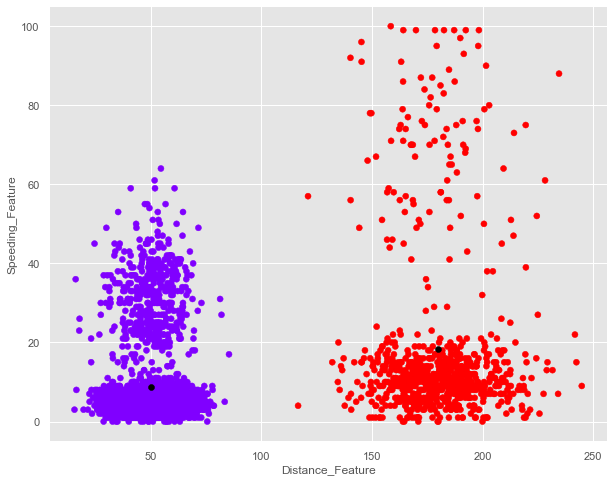

In [115]:
# Getting the value and plotting it
f1_1184077 = df_1184077['Distance_Feature'].values 
f2_1184077 = df_1184077['Speeding_Feature'].values
#Fungsi zip Python terutama digunakan untuk menggabungkan data dari dua elemen iterable bersama-sama. 
X=np.array(list(zip(f1_1184077,f2_1184077)))

fig=plt.gcf()
fig.set_size_inches(10,8)
kmeans = KMeans(n_clusters=2).fit(X) 

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.show()

Dari data jelas terbagi menjadi 2 cluster

# 5. Proses Clustering

In [116]:
#hanya dibutuhkan features jarak dan kecepatan
C_1184077 = np.array(list(zip(f1_1184077, f2_1184077)))
C_1184077

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

**6. Lihat Bentuk datanya dalam matriks**

In [123]:
matriks = df_1184077.iloc[:,1:3]
matriks.shape

(4000, 2)

Clustering dengan jumlah K= 2

In [130]:
k=2
kmeans = KMeans(n_clusters = 2)

#lakukan fitting data
kmeans.fit(df_1184077.drop(['Driver_ID'], axis=1))

KMeans(n_clusters=2)

In [131]:
cluster.KMeans?

**7. Lakukan Prediksi data yang sudah di buat ke model  2 cluster**

In [132]:
# cek label
kmeans.labels_


array([0, 0, 0, ..., 1, 1, 1])

In [133]:
predict = kmeans.predict(C_1184077)
predict

array([0, 0, 0, ..., 1, 1, 1])

**8. Melihat centroid pada data**
- Simpan kedalam variable = centroid_NPM

In [134]:
centroid_1184077 = kmeans.cluster_centers_
centroid_1184077

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

**9. Visualisasi Centroids**

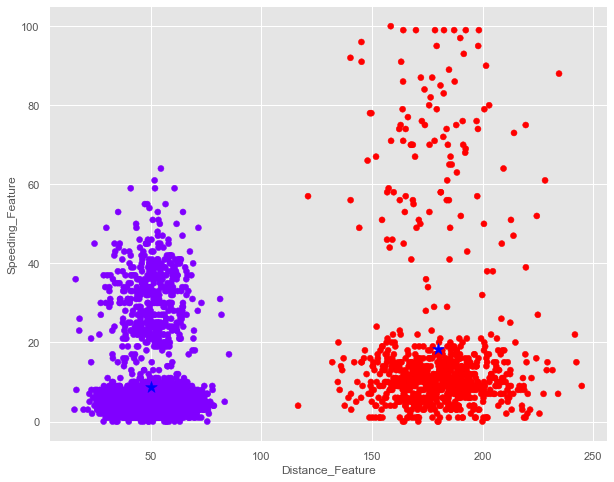

In [135]:
X=np.array(list(zip(f1_1184077,f2_1184077)))

fig=plt.gcf()
fig.set_size_inches(10,8)
kmeans = KMeans(n_clusters=2).fit(X) 

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s=150,marker="*", color='blue')
plt.show()

**10.Posisi kedua centroids**

In [98]:
centroid_1184077

array([[ 71.24,  52.53,  64.54, ..., 170.91, 176.14, 168.03],
       [ 28.  ,  25.  ,  27.  , ...,  12.  ,   5.  ,   9.  ]])

# Jika k= 4

In [138]:
k = 4
kmeans = KMeans(n_clusters=k)
#lakukan fitting data
kmeans.fit(df_1184077.drop(['Driver_ID'], axis=1))

KMeans(n_clusters=4)

In [140]:
#predict
predict = kmeans.predict(C_1184077)
predict

array([2, 2, 2, ..., 0, 0, 0])

**11.Visualisasikan Posisi keempat centroids**

In [142]:
#plotting along with the centroids

centroid_1184077 = kmeans.cluster_centers_

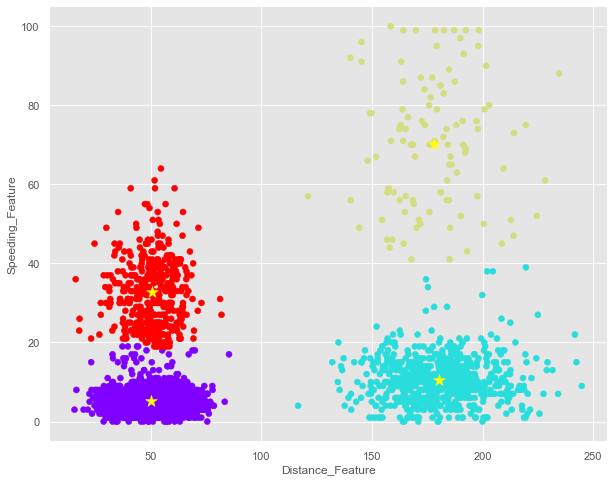

In [146]:
X=np.array(list(zip(f1_1184077,f2_1184077)))

fig=plt.gcf()
fig.set_size_inches(10,8)
kmeans = KMeans(n_clusters=4).fit(X) 

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s=150,marker="*", color='yellow')
plt.show()

**12.Posisi keempat centroids**

In [147]:
centroid_1184077

array([[180.34311782,  10.52011494],
       [ 49.98140338,   5.23425693],
       [ 50.48482185,  32.55581948],
       [177.83509615,  70.28846154]])